# Pemograaman Dasar Sains Data : Tugas Klasifikasi Text
- Kelompok : 3
- Anggota : </br>
10123017 - Rai Ardia</br>
10123018 - Risyad Damar Zaki</br>
10123039 - Rizky Nugraha Kadar</br>
10123024 - Ananda Fityan</br>
10123005 - Edi Junaedi</br>
10123014 - Muhammad Murfid Nurhadi</br>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Pengecekkan Kelengkapan Data

In [33]:
data = pd.read_csv('Sample-Superstore.csv')
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [35]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [36]:
data.duplicated().sum()

0

In [37]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [41]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Year  Month  
0     0.00   41.9136  2016     11  
1     0.00  219.5820  2016     11  
2     0.00    6.8714  2016      6  
3     0.45 -383.0310  2015     10  
4     0.20    2.5164  2015     10  

[5 rows x 23 columns]

Filtering Data Tahun 2015

In [42]:
Data_2015 = data[data['Year'] == 2015]
Data_2015.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
3        4  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   
4        5  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   
14      15  US-2015-118983 2015-11-22  2015-11-26  Standard Class    HP-14815   
15      16  US-2015-118983 2015-11-22  2015-11-26  Standard Class    HP-14815   
24      25  CA-2015-106320 2015-09-25  2015-09-30  Standard Class    EB-13870   

     Customer Name      Segment        Country             City  ...  \
3   Sean O'Donnell     Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell     Consumer  United States  Fort Lauderdale  ...   
14   Harold Pawlan  Home Office  United States       Fort Worth  ...   
15   Harold Pawlan  Home Office  United States       Fort Worth  ...   
24     Emily Burns     Consumer  United States             Orem  ...   

         Product ID         Category Sub-Category  \
3   FUR-TA-10000577        Furniture       Tables   
4   OFF-ST-10000760  Office Supplies      Storage   
14  OFF-AP-10002311  Office Supplies   Appliances   
15  OFF-BI-10000756  Office Supplies      Binders   
24  FUR-TA-10000577        Furniture       Tables   

                                         Product Name      Sales Quantity  \
3       Bretford CR4500 Series Slim Rectangular Table   957.5775        5   
4                      Eldon Fold 'N Roll Cart System    22.3680        2   
14  Holmes Replacement Filter for HEPA Air Cleaner...    68.8100        5   
15   Storex DuraTech Recycled Plastic Frosted Binders     2.5440        3   
24      Bretford CR4500 Series Slim Rectangular Table  1044.6300        3   

   Discount    Profit  Year  Month  
3      0.45 -383.0310  2015     10  
4      0.20    2.5164  2015     10  
14     0.80 -123.8580  2015     11  
15     0.80   -3.8160  2015     11  
24     0.00  240.2649  2015      9  

[5 rows x 23 columns]

Jumlah Transaksi Perbulan

In [43]:
transaski_per_bulan = Data_2015.groupby('Month')['Sales'].count().sort_index()
bulan_list = transaski_per_bulan.index.tolist()
jml_transaksi = transaski_per_bulan.values.tolist()
print(bulan_list)
print(jml_transaksi)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[58, 64, 138, 160, 146, 138, 140, 159, 293, 166, 324, 316]


Diagram Batang Jumlah Transaksi Perbulan

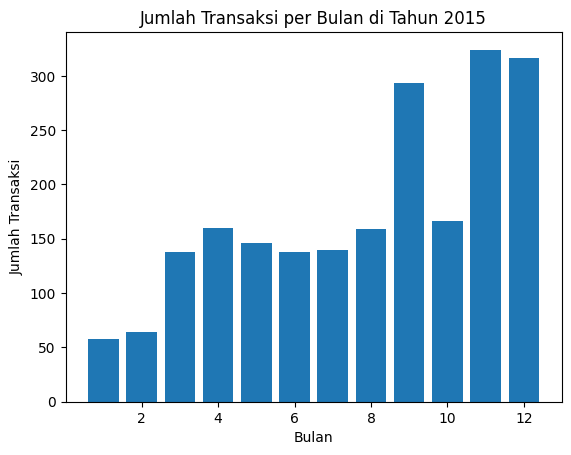

In [44]:
plt.bar(bulan_list, jml_transaksi)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi per Bulan di Tahun 2015')
plt.show()

Keuntungan/Kerugian Berdasarkan Kategori Produk

In [45]:
Kategori_rugi = data.groupby('Category')['Profit'].sum().sort_values()
kategori_list = Kategori_rugi.index.tolist()
profil_list = Kategori_rugi.values.tolist()
print(kategori_list)
print(profil_list)

['Furniture', 'Office Supplies', 'Technology']
[18451.272799999995, 122490.8008, 145454.9481]


Diagram Lingkaran Keuntungan/Kerugian Yang Terbagi Bedasarkan Kategori

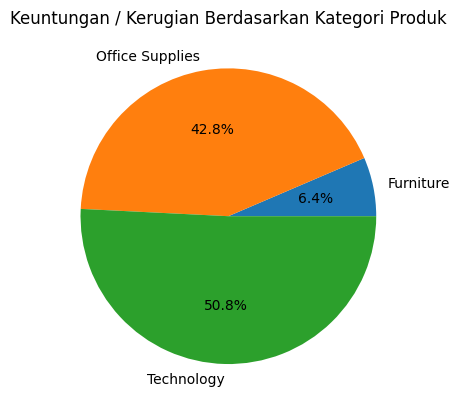

In [46]:
plt.pie(profil_list, labels=kategori_list, autopct='%1.1f%%')
plt.title('Keuntungan / Kerugian Berdasarkan Kategori Produk')
plt.show()

Produk Yang Memiliki Keuntungan dan Kerugian Terbesar

In [47]:
produk_rugi = data.groupby('Product Name')['Profit'].sum().sort_values()
produk_profit_rugi = produk_rugi.idxmin()
produk_profit_untung = produk_rugi.idxmax()
print(f'Produk Dengan Kerugian Terbesar : {produk_profit_rugi} dengan profit {produk_rugi.min()}')
print(f'Produk Dengan Keuntungan Terbesar : {produk_profit_untung} dengan profit {produk_rugi.max()}')

Produk Dengan Kerugian Terbesar : Cubify CubeX 3D Printer Double Head Print dengan profit -8879.9704
Produk Dengan Keuntungan Terbesar : Canon imageCLASS 2200 Advanced Copier dengan profit 25199.928


Data Transaksi dari Canada

In [52]:
df_canada = data[data['Order ID'].apply(lambda x: x[:2] == 'CA')]
df_canada.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12  2016-06-16    Second Class    DV-13045   
5       6  CA-2014-115812 2014-06-09  2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-09  2014-06-14  Standard Class    BH-11710   

     Customer Name    Segment        Country         City  ...  \
0      Claire Gute   Consumer  United States    Henderson  ...   
1      Claire Gute   Consumer  United States    Henderson  ...   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...   
5  Brosina Hoffman   Consumer  United States  Los Angeles  ...   
6  Brosina Hoffman   Consumer  United States  Los Angeles  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
5  FUR-FU-10001487        Furniture  Furnishings   
6  OFF-AR-10002833  Office Supplies          Art   

                                        Product Name   Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.96        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62        2   
5  Eldon Expressions Wood and Plastic Desk Access...   48.86        7   
6                                         Newell 322    7.28        4   

  Discount    Profit  Year  Month  
0      0.0   41.9136  2016     11  
1      0.0  219.5820  2016     11  
2      0.0    6.8714  2016      6  
5      0.0   14.1694  2014      6  
6      0.0    1.9656  2014      6  

[5 rows x 23 columns]

Diagram Titik Mengenai Tren Penjualan Bulanan

In [49]:
sales_trend = data.groupby('Month')['Sales'].sum().reset_index()
fig_trend = px.line(sales_trend, x='Month', y='Sales', title='Tren Penjualan Bulanan', markers=True)
fig_trend.show()

Diagram Batang Mengenai Distribusi Diskon

In [50]:
fig_discount = px.histogram(data, x='Discount', nbins=20, title='Distribusi Diskon')
fig_discount.show()

Korelasi Antara Penjualan dan Keuntungan

In [51]:
fig_correlation = px.scatter(data, x='Sales', y='Profit', title='Korelasi Penjualan dan Keuntungan', color='Category')
fig_correlation.show()